In [202]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [288]:
net = cv2.dnn.readNetFromDarknet('../weights/yolov3.cfg', '../weights/yolov3.weights')

In [289]:
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

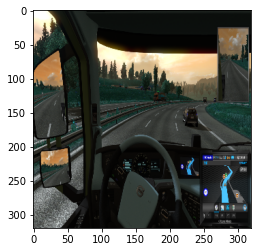

In [299]:
img = cv2.imread('../images/1591496943700.png')

img = cv2.resize(img, (320,320))
plt.imshow(img)

In [300]:
blob = cv2.dnn.blobFromImage(img, 1/255, (416,416), [0,0,0], 1, crop=False)

In [301]:
net.setInput(blob)
blob.shape

(1, 3, 416, 416)

In [304]:
# Get the names of the output layers
def getOutputsNames(net):
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [316]:
%%time
layerOutputs = net.forward(getOutputsNames(net))

Wall time: 453 ms


In [320]:
# initialize our lists of detected bounding boxes, confidences, and
# class IDs, respectively
boxes = []
confidences = []
classIDs = []

W, H = (1920, 1080)

# loop over each of the layer outputs
for output in layerOutputs:
	# loop over each of the detections
	for detection in output:
        # extract the class ID and confidence (i.e., probability) of
		# the current object detection
		scores = detection[5:]
		classID = np.argmax(scores)
		confidence = scores[classID]
		# filter out weak predictions by ensuring the detected
		# probability is greater than the minimum probability
		if confidence > 0.5:
			# scale the bounding box coordinates back relative to the
			# size of the image, keeping in mind that YOLO actually
			# returns the center (x, y)-coordinates of the bounding
			# box followed by the boxes' width and height
			box = detection[0:4] * np.array([W, H, W, H])
			(centerX, centerY, width, height) = box.astype("int")
			# use the center (x, y)-coordinates to derive the top and
			# and left corner of the bounding box
			x = int(centerX - (width / 2))
			y = int(centerY - (height / 2))
			# update our list of bounding box coordinates, confidences,
			# and class IDs
			boxes.append([x, y, int(width), int(height)])
			confidences.append(float(confidence))
			classIDs.append(classID)

[0.8366997838020325, 0.602593183517456, 0.9424284100532532]

In [ ]:
layerNames = net.getLayerNames()
lastLayerId = net.getLayerId(layerNames[-1])
lastLayer = net.getLayer(lastLayerId)


In [297]:
lastLayer.type

'Region'

In [298]:
net.getUnconnectedOutLayersNames()

['yolo_82', 'yolo_94', 'yolo_106']

In [277]:
output = net.getLayer(net.getLayerId('yolo_106'))

In [279]:
getOutputsNames(net)

['yolo_82', 'yolo_94', 'yolo_106']